# Twitter EDA

### Import Dependencies

In [1]:
import pandas as pd
import re
import string
from textblob import TextBlob

import pickle # just in case

### Set file locations

In [2]:
# Raw data file for tweet text (input file)
tweet_text_file = '../00_data/twitter_data/twitter_text.csv'

# File for cleaned tweet text (input file)
clean_csv = '../00_data/twitter_data/twitter_data_cleaned.csv'

# File for cleaned tweet text (input file)
cleantext_csv = '../00_data/twitter_data/twitter_cleantext.csv'

### Read in the data

In [3]:
df = pd.read_csv(cleantext_csv)

In [4]:
df.head()

,tweet_id,full_text,clean_text
0,1.364223e+18,Here’s what's in the COVID relief package:\n \...,here’s whats in the covid relief package direc...
1,1.364381e+18,Will the National Endowment for the Arts be he...,will the national endowment for the arts be he...
2,1.364610e+18,"This is both anecdotal and early, but many lon...",this is both anecdotal and early but many long...
3,1.364727e+18,A Link to Professor Chossudovsky’s Analysis of...,a link to professor chossudovsky’s analysis of...
4,1.364727e+18,Children warned over hugging grandparents even...,children warned over hugging grandparents even...


In [5]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51157 entries, 0 to 51156
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    51157 non-null  float64
 1   full_text   51157 non-null  object 
 2   clean_text  51136 non-null  object 
dtypes: float64(1), object(2)
memory usage: 1.2+ MB


In [6]:
df.fillna(value=' ', inplace=True)

In [7]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51157 entries, 0 to 51156
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    51157 non-null  float64
 1   full_text   51157 non-null  object 
 2   clean_text  51157 non-null  object 
dtypes: float64(1), object(2)
memory usage: 1.2+ MB


### Sentiment analysis (by tweet)

In [8]:
# This takes a little while (<2 minutes)

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

df['polarity'] = df['clean_text'].apply(pol)
df['subjectivity'] = df['clean_text'].apply(sub)
df

,tweet_id,full_text,clean_text,polarity,subjectivity
0,1.364223e+18,Here’s what's in the COVID relief package:\n \...,here’s whats in the covid relief package direc...,0.233333,0.766667
1,1.364381e+18,Will the National Endowment for the Arts be he...,will the national endowment for the arts be he...,0.000000,0.500000
2,1.364610e+18,"This is both anecdotal and early, but many lon...",this is both anecdotal and early but many long...,0.333333,0.480556
3,1.364727e+18,A Link to Professor Chossudovsky’s Analysis of...,a link to professor chossudovsky’s analysis of...,0.200000,0.200000
4,1.364727e+18,Children warned over hugging grandparents even...,children warned over hugging grandparents even...,0.007000,0.541000
...,...,...,...,...,...
51152,1.366553e+18,EU - GERMANY ....and the beat goes on.... Wher...,eu germany and the beat goes on where are the ...,-0.250000,0.250000
51153,1.366549e+18,@satyendrajain @ArvindKejriwal @DrKKAggarwal ...,vaccination of frontline officers is being del...,-0.031818,0.277273
51154,1.366547e+18,Do it the Coward and Liar way. Get vaccinated ...,do it the coward and liar way get vaccinated a...,0.000000,0.000000
51155,1.366544e+18,Trump urges supporters to get vaccinated again...,trump urges supporters to get vaccinated again...,0.000000,0.000000


array([[<AxesSubplot:title={'center':'polarity'}>]], dtype=object)

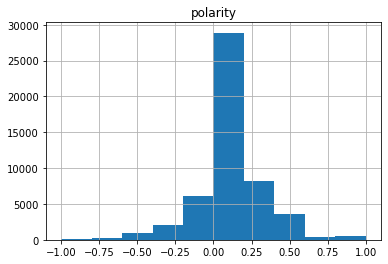

In [9]:
df.hist(column = 'polarity')

array([[<AxesSubplot:title={'center':'subjectivity'}>]], dtype=object)

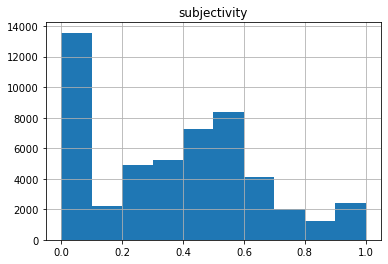

In [10]:
df.hist(column = 'subjectivity')

<AxesSubplot:xlabel='subjectivity', ylabel='polarity'>

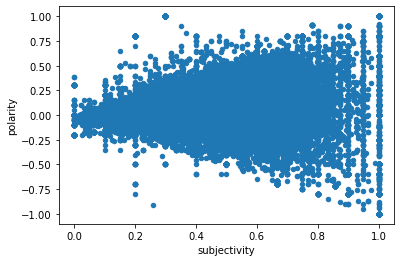

In [11]:
df.plot.scatter(x='subjectivity', y='polarity')

In [12]:
df.drop('full_text', axis=1, inplace=True)

In [13]:
new_df = pd.read_csv(clean_csv)

In [14]:
new_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51157 entries, 0 to 51156
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tweet_id             51157 non-null  float64
 1   created_at           51157 non-null  object 
 2   full_text            51157 non-null  object 
 3   geo                  77 non-null     object 
 4   coordinates          77 non-null     object 
 5   place                1005 non-null   object 
 6   retweet_count        51157 non-null  int64  
 7   favorite_count       51157 non-null  int64  
 8   possibly_sensitive   51157 non-null  object 
 9   lang                 51157 non-null  object 
 10  user_id              51157 non-null  float64
 11  created_at_datetime  51157 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 4.7+ MB


In [15]:
# lost the datetime format in csv. Fix that
new_df['created_at_datetime'] = pd.to_datetime(new_df['created_at_datetime'])

In [16]:
new_df = new_df.merge(df, how='left', on='tweet_id')

In [17]:
new_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51165 entries, 0 to 51164
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   tweet_id             51165 non-null  float64            
 1   created_at           51165 non-null  object             
 2   full_text            51165 non-null  object             
 3   geo                  77 non-null     object             
 4   coordinates          77 non-null     object             
 5   place                1005 non-null   object             
 6   retweet_count        51165 non-null  int64              
 7   favorite_count       51165 non-null  int64              
 8   possibly_sensitive   51165 non-null  object             
 9   lang                 51165 non-null  object             
 10  user_id              51165 non-null  float64            
 11  created_at_datetime  51165 non-null  datetime64[ns, UTC]
 12  clean_text        

array([[<AxesSubplot:title={'center':'retweet_count'}>]], dtype=object)

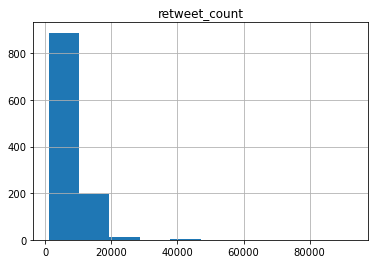

In [28]:
new_df.loc[new_df['retweet_count'] > 1000].hist(column = 'retweet_count')

array([[<AxesSubplot:title={'center':'favorite_count'}>]], dtype=object)

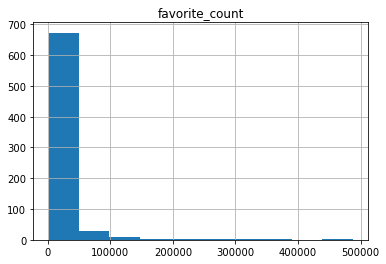

In [31]:
new_df.loc[new_df['favorite_count'] > 1000].hist(column = 'favorite_count')

<AxesSubplot:xlabel='subjectivity', ylabel='retweet_count'>

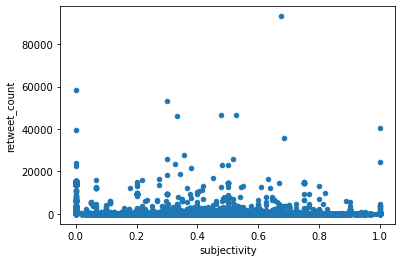

In [18]:
new_df.plot.scatter(x='subjectivity', y='retweet_count')

<AxesSubplot:xlabel='subjectivity', ylabel='retweet_count'>

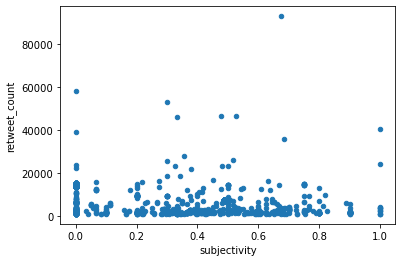

In [33]:
new_df.loc[new_df['retweet_count'] > 1000].plot.scatter(x='subjectivity', y='retweet_count')

<AxesSubplot:xlabel='polarity', ylabel='retweet_count'>

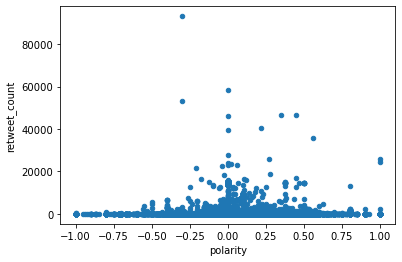

In [19]:
new_df.plot.scatter(x='polarity', y='retweet_count')

<AxesSubplot:xlabel='subjectivity', ylabel='favorite_count'>

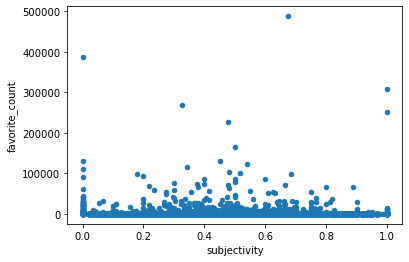

In [20]:
new_df.plot.scatter(x='subjectivity', y='favorite_count')

<AxesSubplot:xlabel='polarity', ylabel='favorite_count'>

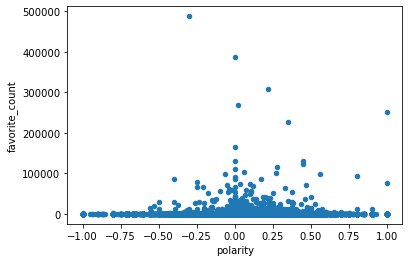

In [21]:
new_df.plot.scatter(x='polarity', y='favorite_count')

<AxesSubplot:xlabel='retweet_count', ylabel='favorite_count'>

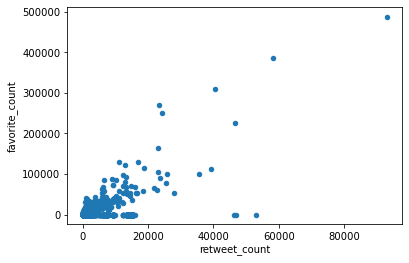

In [22]:
new_df.plot.scatter(x='retweet_count', y='favorite_count')

<AxesSubplot:xlabel='subjectivity', ylabel='polarity'>

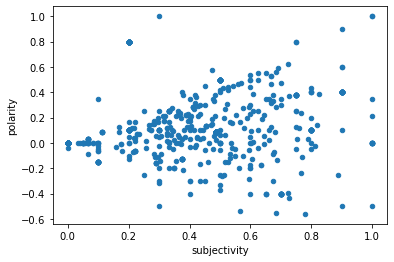

In [35]:
new_df.loc[new_df['retweet_count'] > 1000].plot.scatter(x='subjectivity', y='polarity')